<a href="https://colab.research.google.com/github/RodriCalle/ComplejidadAlgoritmica/blob/main/15_Kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import heapq as hq

In [2]:
import graphviz as gv
import numpy as np
import pandas as pd
import heapq as hq
import math

def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g


In [3]:
%%file 1.in
2|3 3|8 4|9
2|1 3|7 5|7
0|3 1|1 4|8 6|7
0|8 1|7 5|2
0|9 2|8 7|6
1|7 3|2 6|2 7|9
2|7 5|2 7|1
4|6 5|9 6|1

Writing 1.in


In [4]:
class DisjointSet:
  def __init__(self, n):
    self.S = [-1]*n
  
  def find(self, a):
    if self.S[a] < 0:
      return a
    parent = self.find(self.S[a])
    self.S[a] = parent
    return parent

  def sameset(self, a, b):
    return self.find(a) == self.find(b)

  def union(self, a, b):
    if self.sameset(a, b):
      return
    rx = self.find(a)
    ry = self.find(b)
    
    if self.S[rx] < self.S[ry]:
      self.S[rx] += self.S[ry]
      self.S[ry] = rx
    else:
      self.S[ry] += self.S[rx]
      self.S[rx] = ry

#Kruskal

In [5]:
def kruskal(G):
  n = len(G)
  ds = DisjointSet(n)
  edges = []
  T = []

  for u in range(n):
    for v,w in G[u]:
      hq.heappush(edges, (w, u, v) )

  while edges and n > 0:
    w,u,v = hq.heappop(edges)
    if not ds.sameset(u,v):
      ds.union(u, v)
      T.append( [u,v,w] )
      n-=1
  return T

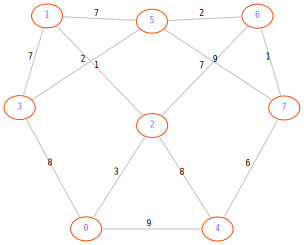

In [6]:
G, _ = readAdjl("1.in", weighted=True)
adjlShow(G, weighted=True)

In [7]:
Tkruskal = kruskal(G)
print(Tkruskal)

[[1, 2, 1], [6, 7, 1], [3, 5, 2], [5, 6, 2], [0, 2, 3], [4, 7, 6], [1, 3, 7]]
